In [3]:
import pandas  as pd 
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import os 
from pathlib import Path
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')
import glob
import plotly.express as px 



The dataset includes the following variables:

Date: The date of the observation.
Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
Automobile_Sales: The number of vehicles sold during the period.
GDP: The per capita GDP value in USD.
Unemployment_Rate: The monthly unemployment rate.
Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
Price: The average vehicle price during the period.
Advertising_Expenditure: The advertising expenditure of the company. 10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar, Mediumfamilycar, Executivecar, Sports. 11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers. 12.Month: Month of the observation extracted from Date.. 13.Year: Year of the observation extracted from Date.
the dataset  is a historical_automobile_sales data  and to understand the historical trends in automobile sales during recession periods. recession period 1 - year 1980 recession period 2 - year 1981 to 1982 recession period 3 - year 1991 recession period 4 - year 2000 to 2001 recession period 5 - year end 2007 to mid 2009 recession period 6 - year 2020 -Feb to April (Covid-19 Impact). from this dataset there are some question that i have draw  and it is listed below:

What is the trend in automobile sales during recession periods compared to non-recession periods?
How does the GDP value vary during recession periods compared to non-recession periods?
#Is there a correlation between the unemployment rate and automobile sales during recession periods?
How does consumer confidence fluctuate during recession periods?
What is the impact of seasonality on automobile sales during recession periods?
How do vehicle prices change during recession periods compared to non-recession periods?

Which vehicle types are most affected by recession periods?

Are there any significant differences in automobile sales between different years?
How do GDP values vary across different years?
Is there a correlation between unemployment rate and consumer confidence?
How does advertising expenditure vary across different vehicle types?
How does the unemployment rate vary across different months?
What is the distribution of automobile sales by vehicle type?
How does the unemployment rate compare between recession and non-recession periods?



In [6]:
URL = ("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv")
df=pd.read_csv(URL)
df.head(2)

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York


In [12]:
df.isnull().sum().any()

False

In [8]:
df.shape

(528, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     528 non-null    object 
 1   Year                     528 non-null    int64  
 2   Month                    528 non-null    object 
 3   Recession                528 non-null    int64  
 4   Consumer_Confidence      528 non-null    float64
 5   Seasonality_Weight       528 non-null    float64
 6   Price                    528 non-null    float64
 7   Advertising_Expenditure  528 non-null    int64  
 8   Competition              528 non-null    int64  
 9   GDP                      528 non-null    float64
 10  Growth_Rate              528 non-null    float64
 11  unemployment_rate        528 non-null    float64
 12  Automobile_Sales         528 non-null    float64
 13  Vehicle_Type             528 non-null    object 
 14  City                     5

Text(0.5, 1.0, 'Sale of Automobile vehicle from  1980 2020')

<Figure size 2400x1600 with 0 Axes>

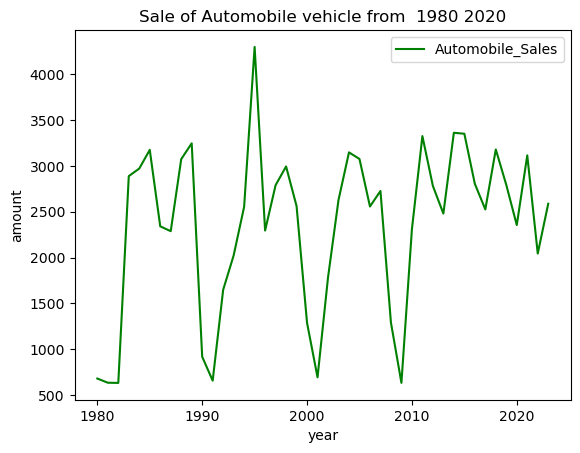

In [285]:
# automobile sale trend from year to year 
df1 = df.groupby('Year')['Automobile_Sales'].mean().reset_index().set_index('Year')
plt.figure(figsize=(24,16))
df1.plot(kind='line', color = 'g')
plt.xlabel('year')
plt.ylabel('amount')
plt.title('Sale of Automobile vehicle from  1980 2020')



Text(0.5, 1.0, 'Sale of Automobile vehicle from  1980 2020')

<Figure size 1200x900 with 0 Axes>

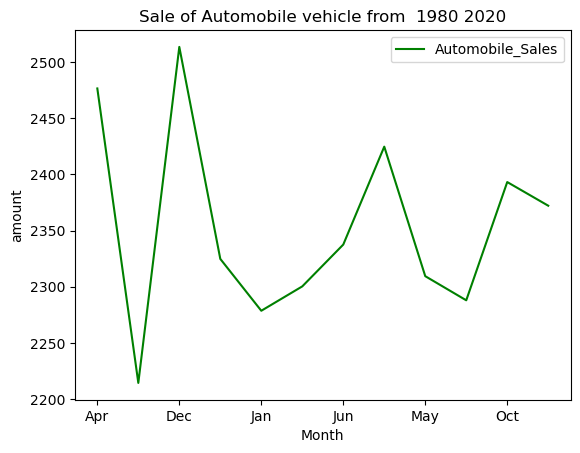

In [286]:
# automobile sale trend  monthly from 1980 to 2020 
df1 = df.groupby('Month')['Automobile_Sales'].mean().reset_index().set_index('Month').sort_values(by='Month', ascending =True )
plt.figure(figsize=(12,9))
df1.plot(kind='line', color = 'g')
plt.xlabel('Month')
plt.ylabel('amount')
plt.title('Sale of Automobile vehicle from  1980 2020')


In [130]:
#What is the trend in automobile sales during recession periods compared to non-recession periods?
# where 1 is during  recession and 0 is non recession period 
df_rece = df.groupby('Recession')['Automobile_Sales'].sum().reset_index()
df_rece

,Recession,Automobile_Sales
0,0,1168952.74
1,1,73282.40


([<matplotlib.axis.XTick at 0x21688dab550>,
 [Text(1, 0, 'Recession'), Text(0, 0, 'Non Recession ')])

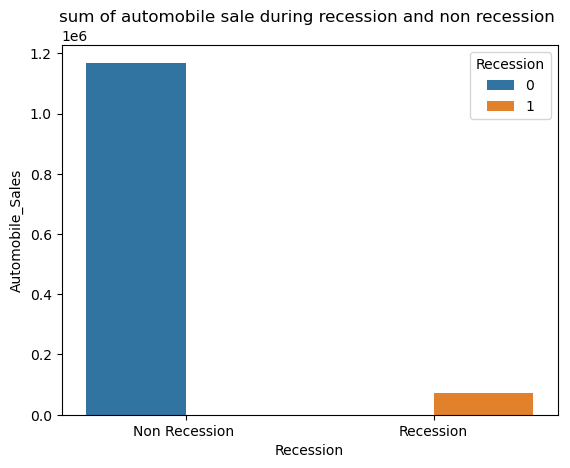

In [139]:
sns.barplot(data = df_rece, x=df_rece['Recession'], y=df_rece['Automobile_Sales'], hue ='Recession')
plt.title('sum of automobile sale during recession and non recession ')
plt.xticks(ticks=[1,0], labels =['Recession','Non Recession '])

Text(0.5, 1.0, 'Sale of Automobile vehicle from  1980  to 2020 during   reccession ')

<Figure size 2400x1600 with 0 Axes>

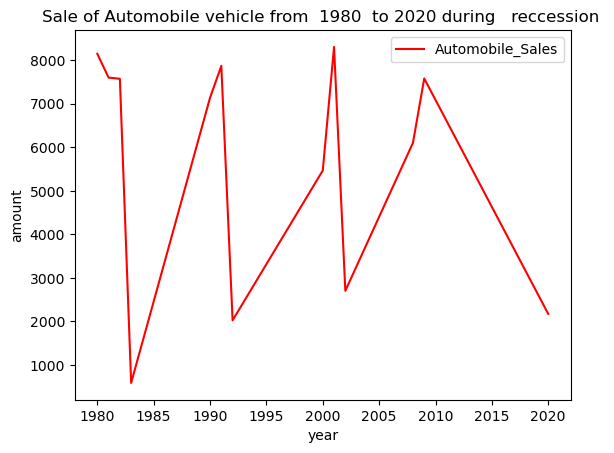

In [154]:
df3 =df[df['Recession']==1]
df3 = df3.groupby('Year')['Automobile_Sales'].sum().reset_index().set_index('Year')
plt.figure(figsize=(24,16))
df3.plot(kind='line', color = 'r')
plt.xlabel('year')
plt.ylabel('amount')
plt.title('Sale of Automobile vehicle from  1980  to 2020 during   reccession ')


Text(0.5, 1.0, 'Saleof Automobile vehicle from  1980 to 2020 during non reccession ')

<Figure size 2400x1600 with 0 Axes>

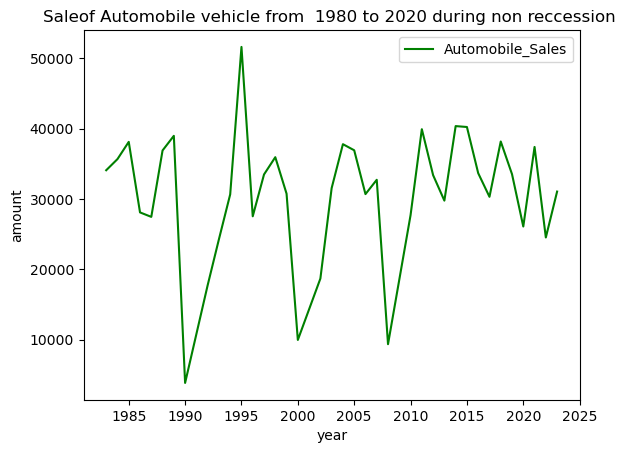

In [157]:
df4 =df[df['Recession']==0]
df4=df4.groupby('Year')['Automobile_Sales'].sum().reset_index().set_index('Year')
plt.figure(figsize=(24,16))
df4.plot(kind='line', color = 'g')
plt.xlabel('year')
plt.ylabel('amount')
plt.title('Saleof Automobile vehicle from  1980 to 2020 during non reccession ')

Text(0.5, 0.98, 'GDP VS RECCESSION')

<Figure size 2400x1600 with 0 Axes>

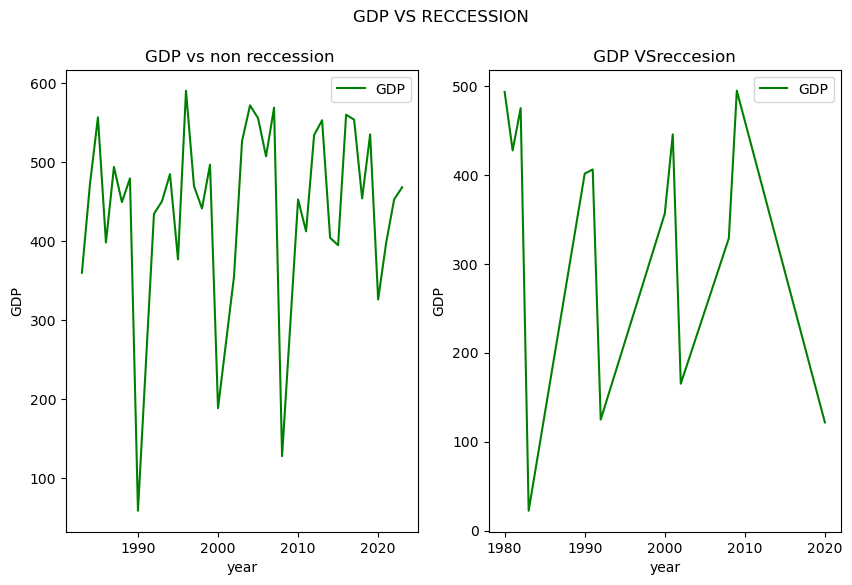

In [199]:
#How does the GDP value vary during recession periods compared to non-recession periods?
df4 =df[df['Recession']==0]
dfGDP=df4.groupby('Year')['GDP'].sum().reset_index().set_index('Year')
plt.figure(figsize=(24,16))
fig,ax= plt.subplots(1,2, figsize=(10,6))
dfGDP.plot(kind='line', color = 'g', ax=ax[0],xlabel =('year'),ylabel=('GDP'),title =('GDP vs non reccession ') )
df5 =df[df['Recession']==1]
dfGDP1=df5.groupby('Year')['GDP'].sum().reset_index().set_index('Year')
dfGDP1.plot(kind='line', color = 'g', ax=ax[1])
plt.xlabel('year')
plt.ylabel('GDP')
plt.title(' GDP VSreccesion ')
plt.suptitle('GDP VS RECCESSION')

<Axes: >

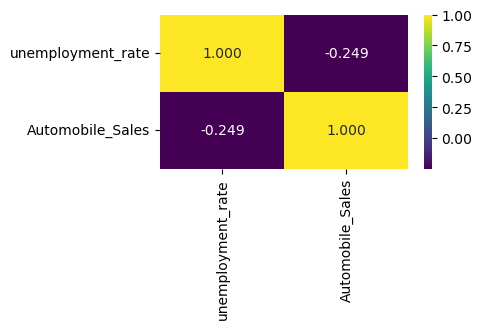

In [187]:
#Is there a correlation between the unemployment rate and automobile sales during recession periods?
df4 =df[df['Recession']==1]
df_corr=df4[[''unemployment_rate'','Automobile_Sales']].corr()
plt.figure(figsize =(4,2))
sns.heatmap(data = df_corr , cmap='viridis', annot=True, fmt='0.3f')


there is negeive correlation between unemployment rate and the automobile sale . which mean that a decrease in umemployemnt rate will lead to the increase in the sale of automobile sale, since there is a negetive correlation between the two  

<Axes: xlabel='Year'>

<Figure size 400x300 with 0 Axes>

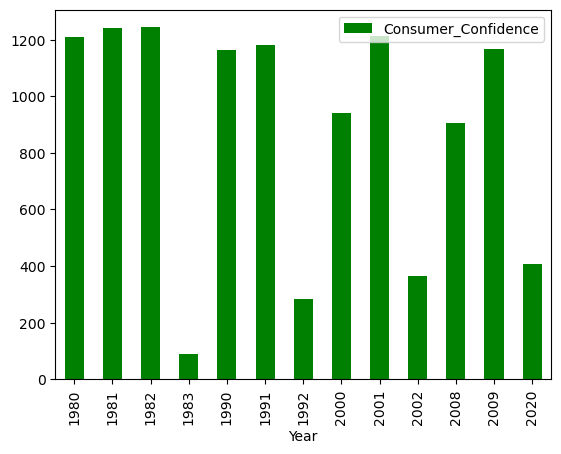

In [220]:
#How does consumer confidence fluctuate during recession periods?
df4 =df[df['Recession']==1]
plt.figure(figsize=(4,3))
df4.groupby('Year').Consumer_Confidence.sum().reset_index().set_index('Year').plot(kind='bar', color ='g')

 from the daigram the customer confident has the minimum values in 1983  and the maximumm values in 1981

<Axes: title={'center': 'during non recession period '}, xlabel='Year'>

<Figure size 400x300 with 0 Axes>

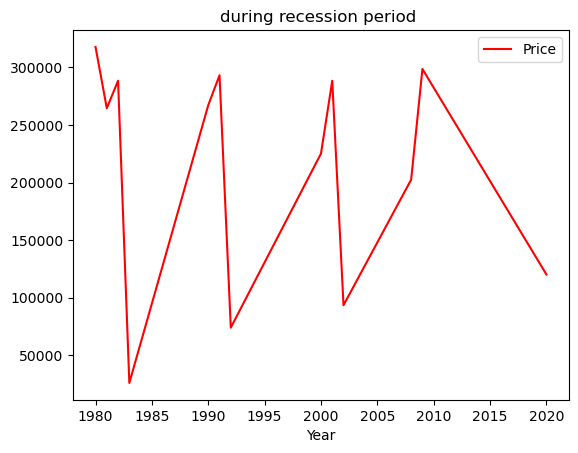

<Figure size 400x300 with 0 Axes>

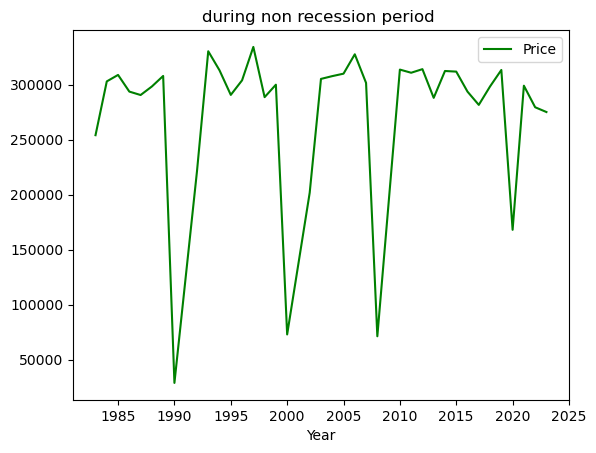

In [221]:
#How do vehicle prices change during recession periods compared to non-recession periods?
df5 =df[df['Recession']==1]
plt.figure(figsize=(4,3))
df5.groupby('Year').Price.sum().reset_index().set_index('Year').plot(kind='line', color ='r', title ='during recession period ')
df6 =df[df['Recession']==0]
plt.figure(figsize=(4,3))
df6.groupby('Year').Price.sum().reset_index().set_index('Year').plot(kind='line', color ='g', title = 'during non recession period ')

 from the daigram there is a drop in price of automobile sale in the follwing year 1981 to 1982,1991,2001,2002and 2020and during this year there is global reccession in the world .the second graph there is increase in sale of automobile  during the non recession period of the graph

<Axes: xlabel='Advertising_Expenditure', ylabel='Automobile_Sales'>

<Figure size 400x1000 with 0 Axes>

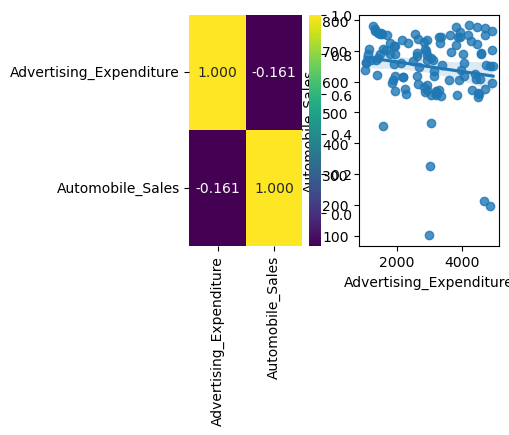

In [216]:
#Is there a relationship between advertising expenditure and automobile sales during recession periods?

df4 =df[df['Recession']==1]
df_corr=df4[['Advertising_Expenditure','Automobile_Sales']].corr()
plt.figure(figsize =(4,10))
fig,ax=plt.subplots(1,2,figsize=(4,3))
sns.heatmap(data = df_corr , cmap='viridis', annot=True, fmt='0.3f', ax=ax[0])
sns.regplot( y=df4['Automobile_Sales'],x=df4['Advertising_Expenditure'], ax=ax[1] )

the realationship between the advertising company and the slae of automobile  has a negetive correlation . beause during receesion the company tend to spend more on advertsing  and the result yeild little or no sale 


In [227]:
#Which vehicle types are most affected by recession periods?
df4 =df[df['Recession']==1]
df4.groupby('Vehicle_Type')['Automobile_Sales'].sum().sort_values( ascending = False)

Vehicle_Type
Mediumfamilycar    28343.6
Smallfamiliycar    23426.4
Supperminicar      20437.4
Executivecar         564.0
Sports               511.0
Name: Automobile_Sales, dtype: float64

during  recession meduimfamily car have the higest sale of vehicle follow by  small familycar, sport car have the least follow by executive car 

In [228]:
#Which vehicle types are most affected by  non recession periods?
df4 =df[df['Recession']==0]
df4.groupby('Vehicle_Type')['Automobile_Sales'].sum().sort_values( ascending = False)

Vehicle_Type
Mediumfamilycar    369706.24
Sports             264867.90
Smallfamiliycar    236728.60
Executivecar       185364.10
Supperminicar      112285.90
Name: Automobile_Sales, dtype: float64

during non reccession meduimfamily car  have the higest sale of vehicle  follow by sport car , the superminicar have the least sale  follow by executiec car

Text(0.5, 1.0, 'GDP VS YEAR')

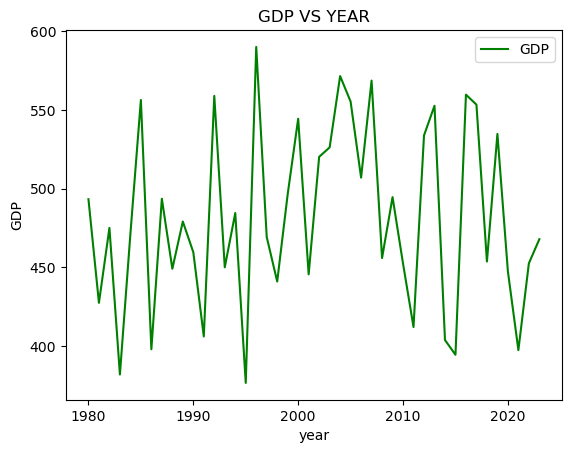

In [255]:
#How do GDP values vary across different years?
df1=df.groupby('Year').GDP.sum().to_frame()
df1.plot(kind='line', color ='g')
plt.xlabel('year')
plt.ylabel('GDP')
plt.title('GDP VS YEAR')


In [258]:
#Is there a correlation between unemployment rate and consumer confidence?
corr_matrix =df[['unemployment_rate','Consumer_Confidence']].corr()
corr_matrix

,unemployment_rate,Consumer_Confidence
unemployment_rate,1.000000,-0.001585
Consumer_Confidence,-0.001585,1.000000


<Axes: ylabel='Vehicle_Type'>

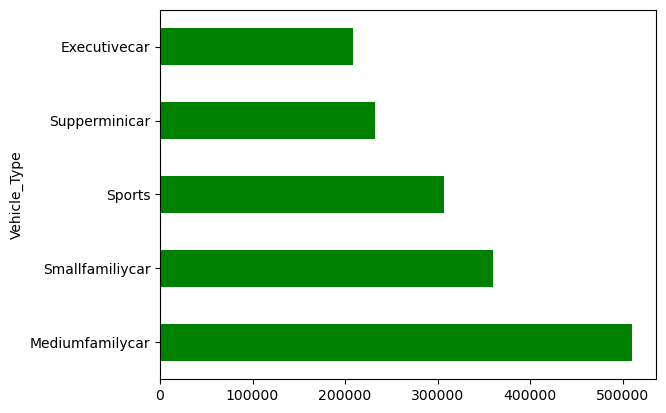

In [270]:
#How does advertising expenditure vary across different vehicle types?
df.groupby('Vehicle_Type').Advertising_Expenditure.sum().sort_values(ascending=False).plot(kind='barh', color ='g')

more money is spend in advertising the meduimfamily car  which result to more sales of the brand

<Axes: ylabel='City'>

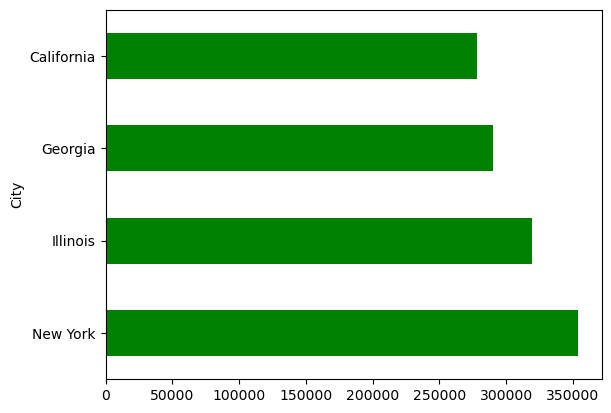

In [268]:
#automobile sale by city 
df.groupby('City').Automobile_Sales.sum().sort_values(ascending =False).plot(kind='barh', color ='g')

<Axes: ylabel='City'>

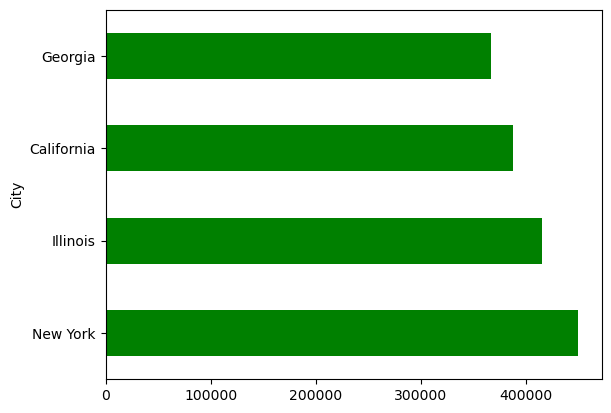

In [272]:
# the city with the higest advertising expenditure 
df.groupby('City').Advertising_Expenditure.sum().sort_values(ascending =False).plot(kind='barh', color ='g')

 we notice that the adversting expenditure is more in new york city that the other city  and this result to more sale of vehicle

<Axes: xlabel='Year', ylabel='unemployment rate '>

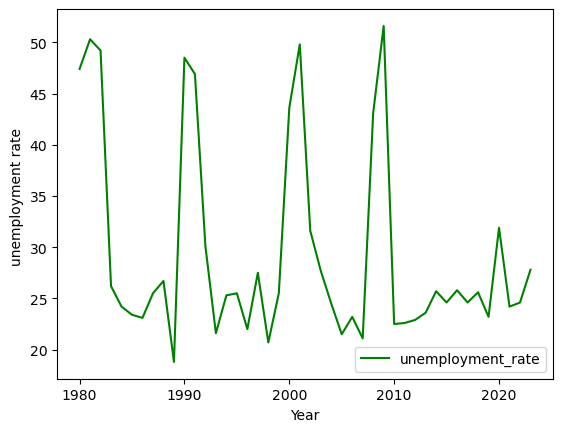

In [278]:
#How does the unemployment rate vary across different months?
df.groupby('Year').unemployment_rate.sum().reset_index().set_index('Year').plot(kind='line', color ='g', ylabel='unemployment rate ')

 from the daigram the rate of employment is maximum during the reccession periods because there  are lose of job during this period which lead to high rate of unemployment

<Axes: title={'center': 'non recession '}, xlabel='Year', ylabel='unemployment rate '>

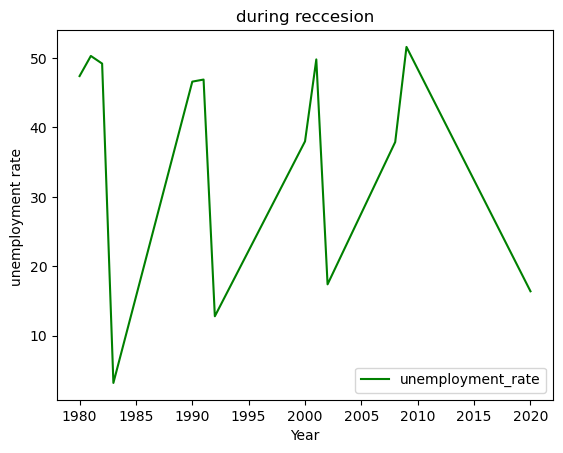

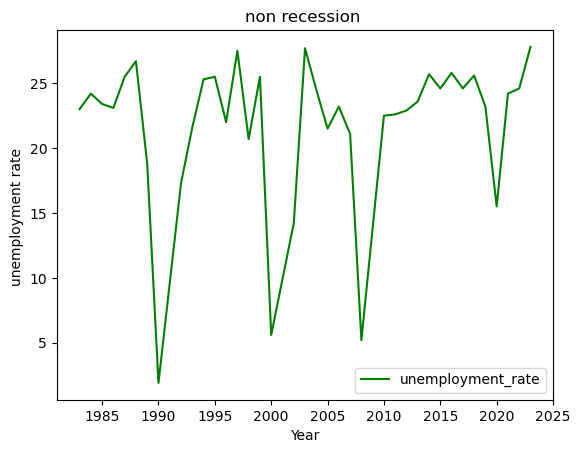

In [284]:
#How does the unemployment rate compare between recession and non-recession periods?
df4 =df[df['Recession']==1]
df4.groupby('Year').unemployment_rate.sum().reset_index().set_index('Year').plot(kind='line', color ='g', ylabel='unemployment rate ', title =('during reccesion' ))
df5 =df[df['Recession']==0]
df5.groupby('Year').unemployment_rate.sum().reset_index().set_index('Year').plot(kind='line', color ='g', ylabel='unemployment rate ', title = ('non recession '))


In this analysis of the historical automobile sales dataset, several key insights have been uncovered regarding trends in automobile sales during recession periods and beyond.

Firstly, it was observed that automobile sales fluctuated significantly during recession periods, with notable downturns in sales observed during recession years such as 1980, 1981-1982, 1991, 2000-2001, 2007-2009, and 2020 (due to the COVID-19 impact). These recessionary periods had varying impacts on consumer behavior, as reflected in changes in GDP, unemployment rates, consumer confidence, and advertising expenditure.

Despite the challenges posed by recessionary periods, certain trends persisted throughout the dataset. For example, the analysis revealed a consistent seasonal pattern in automobile sales, with higher sales volumes observed during certain months of the year. Additionally, the data indicated that vehicle prices remained relatively stable over time, with minor fluctuations observed in response to economic conditions and market dynamics.

Furthermore, the analysis highlighted the importance of various factors influencing automobile sales, such as consumer confidence, advertising expenditure, and competition in the market. These factors play a significant role in shaping consumer preferences and purchasing decisions, particularly during periods of economic uncertainty.

In conclusion, the historical automobile sales dataset provides valuable insights into the dynamics of the automotive industry, offering a nuanced understanding of the interplay between economic factors, consumer behavior, and market trends. By leveraging these insights, industry stakeholders can make informed decisions to navigate challenges and capitalize on opportunities in the ever-evolving automotive market.